In [56]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix,balanced_accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
import numpy as np
import pickle
import random
from sklearn.preprocessing import OneHotEncoder
from numpy import array
import lightgbm as lgb
from lightgbm import plot_importance
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
###特征消除
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as mp,seaborn
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from sklearn.model_selection import StratifiedKFold, cross_val_score
pd.set_option('display.max_columns', None)

In [57]:
df = pd.read_csv('../classify_data/train_data/train_3.csv')
df

ZTF_oid          ra        dec finally_type  Iter_std  \
0      477203200001108  211.680470   2.454280           EW  0.093016   
1      833209200019642   15.149160  70.295140           EW  0.031917   
2      621201200006659  161.200100  23.344090           EW  0.092774   
3      613201400015252  102.572480  22.506110           EW  0.101224   
4      411209100020685  110.438350  -1.535370           EW  0.025324   
...                ...         ...        ...          ...       ...   
17830  701214100018015   65.219680  43.600934          YSO  0.084028   
17831  727212100007102  283.369922  42.061819           CV  0.057833   
17832  759201400000982  228.547279  44.666729          ELL  0.018035   
17833  769214200039587  323.374442  51.456080          ELL  0.065192   
17834  779206300026027   72.536742  53.826746          YSO  0.139650   

            Std  Skewness  Kurtosis  Amplitude   ChiSquare     Cusum  \
0      0.135803  0.550503 -0.921719   0.217215  170.269260  0.137309   
1      0.039787  0.528994 -0.694488   0.069232   12.235037  0.149405   
2      0.099200  0.275558 -1.082212   0.169005   49.579730  0.137027   
3      0.219922  0.899472 -0.520167   0.359041  581.621300  0.185084   
4      0.045502  0.741646 -0.645626   0.077589   25.859350  0.188243   
...         ...       ...       ...        ...         ...       ...   
17830  0.130275 -0.310169  0.650939   0.278036  121.850560  0.167880   
17831  0.080862  0.010300  0.423940   0.169020    1.545489  0.147263   
17832  0.022063  0.269701 -0.193789   0.041776    3.634361  0.057941   
17833  0.065975  0.148223 -1.215857   0.107841   21.623165  0.130791   
17834  0.169990  0.122303 -0.034163   0.341629   93.070465  0.116374   

       MedianAbsDev  Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0          0.095618    62212.570000  1.501318     0.920993  0.850864   
1          0.024014      344.863070  1.768686     0.951518  0.844507   
2          0.080920     4682.072300  1.296008     0.935574  0.861055   
3          0.104487   803850.250000  0.773597     0.758235  0.842763   
4          0.023548     1587.470300  0.662306     0.905549  0.846647   
...             ...             ...       ...          ...       ...   
17830      0.055714    55137.380000  1.210013     0.673788  0.707184   
17831      0.048947        6.445765  1.901509     0.992141  0.767667   
17832      0.015374       34.142338  1.522213     0.983227  0.809100   
17833      0.057371      826.535640  0.743879     0.951320  0.878724   
17834      0.102258    24178.582000  1.520501     0.913789  0.824762   

       Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                      1.384357          0.393162  0.144729   0.230769   
1                      1.451579          0.345486  0.042870   0.430556   
2                      1.183359          0.418079  0.061385   0.248588   
3                      1.859708          0.232964  0.466366   0.429477   
4                      1.699530          0.307566  0.068325   0.411184   
...                         ...               ...       ...        ...   
17830                  0.750117          0.301989 -0.048454   0.569620   
17831                  0.943376          0.277494 -0.001343   0.508951   
17832                  1.141524          0.321799  0.012040   0.448674   
17833                  1.086450          0.424268  0.031118   0.215063   
17834                  0.859047          0.302491 -0.031789   0.480427   

         period  f1_power  percent_amplitude                       DR3Name  \
0      0.202139  0.974669           0.026069  Gaia DR3 3667443681810289280   
1      0.155629  0.835070           0.008853   Gaia DR3 533034239195739392   
2      0.136743  0.928543           0.013728   Gaia DR3 723027889964319872   
3      0.135331  0.950607           0.047095  Gaia DR3 3378716566922638592   
4      0.163037  0.943205           0.009413  Gaia DR3 3109883946714575744   
...         ...       ...                ...                   

In [58]:
df = df.drop(columns=['DR3Name', 'VarFlag', 'Lib', 'APF',])
df

ZTF_oid          ra        dec finally_type  Iter_std  \
0      477203200001108  211.680470   2.454280           EW  0.093016   
1      833209200019642   15.149160  70.295140           EW  0.031917   
2      621201200006659  161.200100  23.344090           EW  0.092774   
3      613201400015252  102.572480  22.506110           EW  0.101224   
4      411209100020685  110.438350  -1.535370           EW  0.025324   
...                ...         ...        ...          ...       ...   
17830  701214100018015   65.219680  43.600934          YSO  0.084028   
17831  727212100007102  283.369922  42.061819           CV  0.057833   
17832  759201400000982  228.547279  44.666729          ELL  0.018035   
17833  769214200039587  323.374442  51.456080          ELL  0.065192   
17834  779206300026027   72.536742  53.826746          YSO  0.139650   

            Std  Skewness  Kurtosis  Amplitude   ChiSquare     Cusum  \
0      0.135803  0.550503 -0.921719   0.217215  170.269260  0.137309   
1      0.039787  0.528994 -0.694488   0.069232   12.235037  0.149405   
2      0.099200  0.275558 -1.082212   0.169005   49.579730  0.137027   
3      0.219922  0.899472 -0.520167   0.359041  581.621300  0.185084   
4      0.045502  0.741646 -0.645626   0.077589   25.859350  0.188243   
...         ...       ...       ...        ...         ...       ...   
17830  0.130275 -0.310169  0.650939   0.278036  121.850560  0.167880   
17831  0.080862  0.010300  0.423940   0.169020    1.545489  0.147263   
17832  0.022063  0.269701 -0.193789   0.041776    3.634361  0.057941   
17833  0.065975  0.148223 -1.215857   0.107841   21.623165  0.130791   
17834  0.169990  0.122303 -0.034163   0.341629   93.070465  0.116374   

       MedianAbsDev  Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0          0.095618    62212.570000  1.501318     0.920993  0.850864   
1          0.024014      344.863070  1.768686     0.951518  0.844507   
2          0.080920     4682.072300  1.296008     0.935574  0.861055   
3          0.104487   803850.250000  0.773597     0.758235  0.842763   
4          0.023548     1587.470300  0.662306     0.905549  0.846647   
...             ...             ...       ...          ...       ...   
17830      0.055714    55137.380000  1.210013     0.673788  0.707184   
17831      0.048947        6.445765  1.901509     0.992141  0.767667   
17832      0.015374       34.142338  1.522213     0.983227  0.809100   
17833      0.057371      826.535640  0.743879     0.951320  0.878724   
17834      0.102258    24178.582000  1.520501     0.913789  0.824762   

       Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                      1.384357          0.393162  0.144729   0.230769   
1                      1.451579          0.345486  0.042870   0.430556   
2                      1.183359          0.418079  0.061385   0.248588   
3                      1.859708          0.232964  0.466366   0.429477   
4                      1.699530          0.307566  0.068325   0.411184   
...                         ...               ...       ...        ...   
17830                  0.750117          0.301989 -0.048454   0.569620   
17831                  0.943376          0.277494 -0.001343   0.508951   
17832                  1.141524          0.321799  0.012040   0.448674   
17833                  1.086450          0.424268  0.031118   0.215063   
17834                  0.859047          0.302491 -0.031789   0.480427   

         period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0      0.202139  0.974669           0.026069  211.680449   2.454253   
1      0.155629  0.835070           0.008853   15.149171  70.295124   
2      0.136743  0.928543           0.013728  161.200096  23.344082   
3      0.135331  0.950607           0.047095  102.572475  22.506105   
4      0.163037  0.943205           0.009413  110.438353  -1.535368   
...         ...       ...                ...         ...        ...   
17830  1.000542  0.079934         

In [59]:
# df = df.rename(columns={'type_01':'finally_type'})
# df = df[['ZTF_oid','ra','dec','finally_type',
#            'Iter_std','Std','Skewness', 'Kurtosis', 'Amplitude', 'ChiSquare','Cusum','MedianAbsDev',
#            'Small_Kurtosis','Eta', 'ShapiroWilk','StetsonK', 'Half_mag_amplitude_ratio','Beyond1std_ratio','gskew', 'MedianBRP','period','f1_power','percent_amplitude',
#         #    'parallax', 'bp_rp','G-BP', 'G-RP',
#         #    'W_JK', 'J-K', 'J-H','W1mag','W2mag','W3mag'
#            ]]
# # df['finally_type'].replace('BE|GCAS|SDOR|WR','BE',inplace=True
# df

In [60]:
### 训练集测试集划分，搭建模型
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.3, random_state=0)
print("train_set's shape:{},test_set's shape:{}".format(train_set.shape,test_set.shape))

train_set's shape:(12484, 157),test_set's shape:(5351, 157)


In [61]:
X_train_normalisation = train_set.iloc[:, 4:157]
#print(X_train_normalisation)
y_train_label = train_set['finally_type']


X_test_normalisation = test_set.iloc[:, 4:157]
y_test_label = test_set['finally_type']

le = LabelEncoder() 
train_y = le.fit_transform(y_train_label)

test_y = le.fit_transform(y_test_label)
print(test_y)

[ 2  3 10 ...  9 11  8]


In [62]:
lamost_data = pd.read_csv('../classify_data/lamost_dr9_v2_data/lamost_s_p_f_candidate_3.csv')
# lamost_data = lamost_data[lamost_data['pred_type'] == 'nonperiod']
##填补空值
lamost_data = lamost_data.fillna(lamost_data.median(numeric_only=True))
lamost_data

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
0        796209200008137  261.544721  56.010894  0.012591  0.032788 -2.772986   
1        796209200004923  262.753611  56.234224  0.011675  0.031341 -2.771988   
2        796209200007368  261.475523  56.075838  0.014425  0.052053 -1.717994   
3        796209200011592  261.855825  56.544137  0.008280  0.011681 -0.015939   
4        796209200007527  261.692065  56.054656  0.012140  0.038886 -2.136281   
...                  ...         ...        ...       ...       ...       ...   
263905   568208200000313  127.104918  18.784975  0.018024  0.044358 -2.194578   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263908  1802201400042344  295.501963  47.606330  0.010693  0.030610 -2.192214   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude  ChiSquare     Cusum  MedianAbsDev  \
0        9.198036   0.074980   6.942147  0.125547      0.009711   
1        8.999222   0.068546   6.308087  0.107762      0.009462   
2        2.047562   0.098935  17.005170  0.107189      0.012750   
3        1.345467   0.024447   1.131972  0.074264      0.006926   
4        4.421062   0.079185   9.651895  0.126875      0.010381   
...           ...        ...        ...       ...           ...   
263905   5.717515   0.113037  13.208816  0.236271      0.017397   
263906  19.407048   0.252544  56.218395  0.180140      0.008955   
263907  -1.012365   0.175859  77.439800  0.261137      0.052669   
263908   5.171203   0.074901   8.706228  0.178593      0.008290   
263909  -0.563191   0.172335  57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0           577.836200  1.577150     0.706334  0.612406   
1           469.738920  1.523210     0.697884  0.607590   
2          1439.881500  1.479795     0.754154  0.740408   
3             2.584917  1.603857     0.987308  0.755586   
4           682.483000  1.643829     0.729566  0.660049   
...                ...       ...          ...       ...   
263905     1641.875400  1.420223     0.778649  0.633273   
263906    78224.870000  2.223314     0.359226  0.411177   
263907    12975.129000  1.156310     0.852562  0.876834   
263908      674.210750  0.969574     0.739220  0.601940   
263909     8524.373000  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                       0.329949          0.113036 -0.111270   0.860529   
1                       0.330107          0.102377 -0.104423   0.852834   
2                       0.318261          0.173272 -0.148222   0.733641   
3                       0.996994          0.267218 -0.001247   0.647383   
4                       0.306943          0.131919 -0.119581   0.824723   
...                          ...               ...       ...        ...   
263905                  0.438350          0.156863 -0.120812   0.647059   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263908                  0.390630          0.132075 -0.073996   0.698113   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude                       DR3Name  \
0         0.499453  0.035690           0.016519  Gaia DR3 1420524840758979456   
1         0.999202  0.053712           0.014377  Gaia DR3 1422025364893544960   
2         0.999202  0.066013           0.016972  Gaia DR3 1420572738234378752   
3        58.770974  0.045294           0.003438  Gaia DR3 1420603318401560960   
4         0.999150  0.055367           0.014072  Gaia DR3 1420530647554769920   
...            ...       ...                ...                           ...   
263905  125.005997  0.362428           0.014493   Gaia DR3 662

In [63]:
# lamost_data = lamost_data[['ZTF_oid','ra','dec','Nobs',
#            'Iter_std','Std','Skewness', 'Kurtosis', 'Amplitude', 'ChiSquare','Cusum','MedianAbsDev',
#            'Small_Kurtosis','Eta', 'ShapiroWilk','StetsonK', 'Half_mag_amplitude_ratio','Beyond1std_ratio','gskew', 'MedianBRP','period','f1_power','percent_amplitude',
#         #    'parallax', 'bp_rp','G-BP', 'G-RP',
#         #    'W_JK', 'J-K', 'J-H','W1mag','W2mag','W3mag'
#            ]]
# lamost_data

In [64]:
lamost_data = lamost_data.drop(columns=['DR3Name', 'VarFlag', 'Lib', 'APF',])
lamost_data

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
0        796209200008137  261.544721  56.010894  0.012591  0.032788 -2.772986   
1        796209200004923  262.753611  56.234224  0.011675  0.031341 -2.771988   
2        796209200007368  261.475523  56.075838  0.014425  0.052053 -1.717994   
3        796209200011592  261.855825  56.544137  0.008280  0.011681 -0.015939   
4        796209200007527  261.692065  56.054656  0.012140  0.038886 -2.136281   
...                  ...         ...        ...       ...       ...       ...   
263905   568208200000313  127.104918  18.784975  0.018024  0.044358 -2.194578   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263908  1802201400042344  295.501963  47.606330  0.010693  0.030610 -2.192214   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude  ChiSquare     Cusum  MedianAbsDev  \
0        9.198036   0.074980   6.942147  0.125547      0.009711   
1        8.999222   0.068546   6.308087  0.107762      0.009462   
2        2.047562   0.098935  17.005170  0.107189      0.012750   
3        1.345467   0.024447   1.131972  0.074264      0.006926   
4        4.421062   0.079185   9.651895  0.126875      0.010381   
...           ...        ...        ...       ...           ...   
263905   5.717515   0.113037  13.208816  0.236271      0.017397   
263906  19.407048   0.252544  56.218395  0.180140      0.008955   
263907  -1.012365   0.175859  77.439800  0.261137      0.052669   
263908   5.171203   0.074901   8.706228  0.178593      0.008290   
263909  -0.563191   0.172335  57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0           577.836200  1.577150     0.706334  0.612406   
1           469.738920  1.523210     0.697884  0.607590   
2          1439.881500  1.479795     0.754154  0.740408   
3             2.584917  1.603857     0.987308  0.755586   
4           682.483000  1.643829     0.729566  0.660049   
...                ...       ...          ...       ...   
263905     1641.875400  1.420223     0.778649  0.633273   
263906    78224.870000  2.223314     0.359226  0.411177   
263907    12975.129000  1.156310     0.852562  0.876834   
263908      674.210750  0.969574     0.739220  0.601940   
263909     8524.373000  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                       0.329949          0.113036 -0.111270   0.860529   
1                       0.330107          0.102377 -0.104423   0.852834   
2                       0.318261          0.173272 -0.148222   0.733641   
3                       0.996994          0.267218 -0.001247   0.647383   
4                       0.306943          0.131919 -0.119581   0.824723   
...                          ...               ...       ...        ...   
263905                  0.438350          0.156863 -0.120812   0.647059   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263908                  0.390630          0.132075 -0.073996   0.698113   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0         0.499453  0.035690           0.016519  261.544740  56.010870   
1         0.999202  0.053712           0.014377  262.753628  56.234198   
2         0.999202  0.066013           0.016972  261.475572  56.075804   
3        58.770974  0.045294           0.003438  261.855822  56.544114   
4         0.999150  0.055367           0.014072  261.692071  56.054634   
...            ...       ...                ...         ...        ...   
263905  125.005997  0.362428           0.014493  127.104935  18.784938   
263906   68.964996  0.094815         

In [65]:
lamost_features = lamost_data.iloc[:, 3:156]

In [66]:
filename = './model/lightgbm_model3.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_lamost = loaded_model.predict(lamost_features)

In [67]:
y_pred_lamost

array([ 3,  3,  9, ..., 11,  6,  5])

In [68]:
lamost_data['pred_type'] = y_pred_lamost

In [69]:
lamost_data

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
0        796209200008137  261.544721  56.010894  0.012591  0.032788 -2.772986   
1        796209200004923  262.753611  56.234224  0.011675  0.031341 -2.771988   
2        796209200007368  261.475523  56.075838  0.014425  0.052053 -1.717994   
3        796209200011592  261.855825  56.544137  0.008280  0.011681 -0.015939   
4        796209200007527  261.692065  56.054656  0.012140  0.038886 -2.136281   
...                  ...         ...        ...       ...       ...       ...   
263905   568208200000313  127.104918  18.784975  0.018024  0.044358 -2.194578   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263908  1802201400042344  295.501963  47.606330  0.010693  0.030610 -2.192214   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude  ChiSquare     Cusum  MedianAbsDev  \
0        9.198036   0.074980   6.942147  0.125547      0.009711   
1        8.999222   0.068546   6.308087  0.107762      0.009462   
2        2.047562   0.098935  17.005170  0.107189      0.012750   
3        1.345467   0.024447   1.131972  0.074264      0.006926   
4        4.421062   0.079185   9.651895  0.126875      0.010381   
...           ...        ...        ...       ...           ...   
263905   5.717515   0.113037  13.208816  0.236271      0.017397   
263906  19.407048   0.252544  56.218395  0.180140      0.008955   
263907  -1.012365   0.175859  77.439800  0.261137      0.052669   
263908   5.171203   0.074901   8.706228  0.178593      0.008290   
263909  -0.563191   0.172335  57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0           577.836200  1.577150     0.706334  0.612406   
1           469.738920  1.523210     0.697884  0.607590   
2          1439.881500  1.479795     0.754154  0.740408   
3             2.584917  1.603857     0.987308  0.755586   
4           682.483000  1.643829     0.729566  0.660049   
...                ...       ...          ...       ...   
263905     1641.875400  1.420223     0.778649  0.633273   
263906    78224.870000  2.223314     0.359226  0.411177   
263907    12975.129000  1.156310     0.852562  0.876834   
263908      674.210750  0.969574     0.739220  0.601940   
263909     8524.373000  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                       0.329949          0.113036 -0.111270   0.860529   
1                       0.330107          0.102377 -0.104423   0.852834   
2                       0.318261          0.173272 -0.148222   0.733641   
3                       0.996994          0.267218 -0.001247   0.647383   
4                       0.306943          0.131919 -0.119581   0.824723   
...                          ...               ...       ...        ...   
263905                  0.438350          0.156863 -0.120812   0.647059   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263908                  0.390630          0.132075 -0.073996   0.698113   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0         0.499453  0.035690           0.016519  261.544740  56.010870   
1         0.999202  0.053712           0.014377  262.753628  56.234198   
2         0.999202  0.066013           0.016972  261.475572  56.075804   
3        58.770974  0.045294           0.003438  261.855822  56.544114   
4         0.999150  0.055367           0.014072  261.692071  56.054634   
...            ...       ...                ...         ...        ...   
263905  125.005997  0.362428           0.014493  127.104935  18.784938   
263906   68.964996  0.094815         

In [70]:
for i,l in enumerate(le.classes_):
    print(i,l)
    lamost_data['pred_type'].replace(i,l,inplace=True)

0 AGN
1 CEP
2 CV
3 EA
4 ELL
5 EW
6 HADS
7 LPV
8 Mira
9 ROT
10 RRAB
11 RRC
12 SR
13 YSO


In [71]:
lamost_data.pred_type.value_counts()

EA      124542
ROT      80731
HADS     26366
SR       12077
EW        6820
YSO       6227
ELL       3140
RRAB      1391
CV        1220
RRC        786
AGN        384
CEP        179
Mira        47
Name: pred_type, dtype: int64

In [72]:
lamost_data

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
0        796209200008137  261.544721  56.010894  0.012591  0.032788 -2.772986   
1        796209200004923  262.753611  56.234224  0.011675  0.031341 -2.771988   
2        796209200007368  261.475523  56.075838  0.014425  0.052053 -1.717994   
3        796209200011592  261.855825  56.544137  0.008280  0.011681 -0.015939   
4        796209200007527  261.692065  56.054656  0.012140  0.038886 -2.136281   
...                  ...         ...        ...       ...       ...       ...   
263905   568208200000313  127.104918  18.784975  0.018024  0.044358 -2.194578   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263908  1802201400042344  295.501963  47.606330  0.010693  0.030610 -2.192214   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude  ChiSquare     Cusum  MedianAbsDev  \
0        9.198036   0.074980   6.942147  0.125547      0.009711   
1        8.999222   0.068546   6.308087  0.107762      0.009462   
2        2.047562   0.098935  17.005170  0.107189      0.012750   
3        1.345467   0.024447   1.131972  0.074264      0.006926   
4        4.421062   0.079185   9.651895  0.126875      0.010381   
...           ...        ...        ...       ...           ...   
263905   5.717515   0.113037  13.208816  0.236271      0.017397   
263906  19.407048   0.252544  56.218395  0.180140      0.008955   
263907  -1.012365   0.175859  77.439800  0.261137      0.052669   
263908   5.171203   0.074901   8.706228  0.178593      0.008290   
263909  -0.563191   0.172335  57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0           577.836200  1.577150     0.706334  0.612406   
1           469.738920  1.523210     0.697884  0.607590   
2          1439.881500  1.479795     0.754154  0.740408   
3             2.584917  1.603857     0.987308  0.755586   
4           682.483000  1.643829     0.729566  0.660049   
...                ...       ...          ...       ...   
263905     1641.875400  1.420223     0.778649  0.633273   
263906    78224.870000  2.223314     0.359226  0.411177   
263907    12975.129000  1.156310     0.852562  0.876834   
263908      674.210750  0.969574     0.739220  0.601940   
263909     8524.373000  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                       0.329949          0.113036 -0.111270   0.860529   
1                       0.330107          0.102377 -0.104423   0.852834   
2                       0.318261          0.173272 -0.148222   0.733641   
3                       0.996994          0.267218 -0.001247   0.647383   
4                       0.306943          0.131919 -0.119581   0.824723   
...                          ...               ...       ...        ...   
263905                  0.438350          0.156863 -0.120812   0.647059   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263908                  0.390630          0.132075 -0.073996   0.698113   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0         0.499453  0.035690           0.016519  261.544740  56.010870   
1         0.999202  0.053712           0.014377  262.753628  56.234198   
2         0.999202  0.066013           0.016972  261.475572  56.075804   
3        58.770974  0.045294           0.003438  261.855822  56.544114   
4         0.999150  0.055367           0.014072  261.692071  56.054634   
...            ...       ...                ...         ...        ...   
263905  125.005997  0.362428           0.014493  127.104935  18.784938   
263906   68.964996  0.094815         

In [73]:
lamost_pred_proba = loaded_model.predict_proba(lamost_features)

In [74]:
lamost_pred_proba

array([[3.55733448e-06, 2.64026734e-05, 2.74434246e-06, ...,
        6.81014342e-07, 5.13688161e-06, 9.46673804e-04],
       [8.78473516e-07, 1.00964072e-05, 6.77599469e-07, ...,
        1.00667075e-07, 9.53465933e-06, 4.23685523e-04],
       [8.20610278e-09, 4.88605268e-09, 2.07035749e-08, ...,
        1.14396591e-09, 3.44876942e-07, 7.98114626e-07],
       ...,
       [2.79611699e-08, 3.31025985e-07, 2.00649123e-08, ...,
        9.99998338e-01, 9.10351692e-08, 2.59667244e-09],
       [1.04926762e-06, 8.60683214e-06, 7.29209405e-07, ...,
        2.15090858e-07, 2.44044602e-06, 5.19486684e-07],
       [9.22846662e-06, 1.16556880e-05, 5.05371259e-06, ...,
        3.55128732e-04, 2.00300455e-06, 3.85769146e-07]])

In [75]:
y_pred_lamost_frame = pd.DataFrame(lamost_pred_proba)
y_pred_lamost_frame

0             1             2             3             4   \
0       3.557334e-06  2.640267e-05  2.744342e-06  9.937078e-01  2.024629e-05   
1       8.784735e-07  1.009641e-05  6.775995e-07  9.960127e-01  3.578515e-06   
2       8.206103e-09  4.886053e-09  2.070357e-08  6.247742e-04  6.132531e-09   
3       3.899096e-05  2.477885e-05  1.381572e-05  1.478689e-03  3.501730e-05   
4       2.263799e-06  9.261225e-06  1.705539e-06  9.928224e-01  1.217255e-06   
...              ...           ...           ...           ...           ...   
263905  4.925145e-06  3.275712e-06  3.210132e-06  3.424866e-01  1.060506e-06   
263906  2.378670e-07  1.499184e-07  9.521648e-08  9.975492e-01  8.521894e-08   
263907  2.796117e-08  3.310260e-07  2.006491e-08  2.786290e-09  1.372185e-08   
263908  1.049268e-06  8.606832e-06  7.292094e-07  2.917738e-01  4.845864e-06   
263909  9.228467e-06  1.165569e-05  5.053713e-06  5.318398e-05  7.445373e-06   

                  5             6             7             8             9   \
0       7.849792e-05  1.038426e-05  1.736217e-06  1.373505e-06  5.176733e-03   
1       1.624450e-06  1.321709e-06  1.596059e-07  4.992508e-07  3.534605e-03   
2       5.092273e-09  1.454700e-08  8.678172e-10  3.171232e-09  9.993740e-01   
3       3.807383e-05  7.910369e-04  1.246172e-06  8.791326e-07  9.972519e-01   
4       1.605998e-06  3.040854e-06  8.094926e-07  1.099457e-06  7.106641e-03   
...              ...           ...           ...           ...           ...   
263905  2.934196e-06  8.377764e-06  8.063664e-07  1.640064e-06  1.090551e-03   
263906  1.681504e-07  1.427704e-07  1.700950e-08  1.017190e-08  5.114771e-06   
263907  1.332440e-08  1.597429e-07  2.578659e-09  2.064313e-09  5.296471e-08   
263908  8.520110e-05  7.081164e-01  1.586023e-07  5.825911e-07  3.694829e-06   
263909  9.995100e-01  2.010292e-05  1.401203e-06  4.657781e-07  5.642377e-06   

                  10            11            12            13  
0       1.808020e-05  6.810143e-07  5.136882e-06  9.466738e-04  
1       5.647890e-07  1.006671e-07  9.534659e-06  4.236855e-04  
2       9.690003e-09  1.143966e-09  3.448769e-07  7.981146e-07  
3       8.889322e-06  1.860517e-06  3.676914e-05  2.780141e-04  
4       1.495005e-06  2.665489e-07  2.386265e-05  2.434701e-05  
...              ...           ...           ...           ...  
263905  6.382216e-06  5.428945e-07  6.563168e-01  7.290035e-05  
263906  4.191207e-08  7.755709e-09  4.067139e-06  2.440625e-03  
263907  9.420892e-07  9.999983e-01  9.103517e-08  2.596672e-09  
263908  1.717689e-06  2.150909e-07  2.440446e-06  5.194867e-07  
263909  1.828147e-05  3.551287e-04  2.003005e-06  3.857691e-07  

[263910 rows x 14 columns]

In [76]:
lamost_data['pred_possibility'] = y_pred_lamost_frame.round(decimals=6).max(axis=1)
lamost_data['pred_possibility']

0         0.993708
1         0.996013
2         0.999374
3         0.997252
4         0.992822
            ...   
263905    0.656317
263906    0.997549
263907    0.999998
263908    0.708116
263909    0.999510
Name: pred_possibility, Length: 263910, dtype: float64

In [77]:
lamost_data.tail(5)

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
263905   568208200000313  127.104918  18.784975  0.018024  0.044358 -2.194578   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263908  1802201400042344  295.501963  47.606330  0.010693  0.030610 -2.192214   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude  ChiSquare     Cusum  MedianAbsDev  \
263905   5.717515   0.113037  13.208816  0.236271      0.017397   
263906  19.407048   0.252544  56.218395  0.180140      0.008955   
263907  -1.012365   0.175859  77.439800  0.261137      0.052669   
263908   5.171203   0.074901   8.706228  0.178593      0.008290   
263909  -0.563191   0.172335  57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
263905      1641.87540  1.420223     0.778649  0.633273   
263906     78224.87000  2.223314     0.359226  0.411177   
263907     12975.12900  1.156310     0.852562  0.876834   
263908       674.21075  0.969574     0.739220  0.601940   
263909      8524.37300  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
263905                  0.438350          0.156863 -0.120812   0.647059   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263908                  0.390630          0.132075 -0.073996   0.698113   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude       RAdeg      DEdeg  \
263905  125.005997  0.362428           0.014493  127.104935  18.784938   
263906   68.964996  0.094815           0.037531   67.674852  24.983349   
263907  143.800995  0.435151           0.018843  244.668317  -1.320751   
263908    0.028961  0.701951           0.009587  295.501936  47.606319   
263909    0.250706  0.781378           0.015576  308.235816  28.989486   

        errHalfMaj  errHalfMin  errPosAng                SolID  \
263905         0.0         0.0      112.0  1636148068921376768   
263906         0.0         0.0       82.0  1636148068921376768   
263907         0.0         0.0       82.0  1636148068921376768   
263908         0.0         0.0      160.0  1636148068921376768   
263909         0.0         0.0      156.0  1636148068921376768   

                     Source     RandomI  e_RAdeg  e_DEdeg     Plx   e_Plx  \
263905   662497026078195584   462771566   0.0127   0.0085  0.2781  0.0158   
263906   150886088055075584    17175667   0.0165   0.0100  2.3223  0.0179   
263907  4406911053023068416  1467397816   0.0192   0.0135  0.1904  0.0232   
263908  2080626743965335680   820156506   0.0166   0.0176  1.3206  0.0189   
263909  1860562244746592000   236474081   0.0183   0.0226  0.2253  0.0313   

            RPlx      PM    pmRA  e_pmRA    pmDE  e_pmDE  RADEcor  RAPlxcor  \
263905   17.5609   3.215  -2.411   0.015  -2.128   0.011  -0.4009    0.1384   
263906  129.4715   6.489   4.433   0.021  -4.739   0.016   0.1551    0.1246   
263907    8.2079  29.384 -23.685   0.023 -17.391   0.017   0.1042   -0.4160   
263908   69.8865   6.406   5.301   0.023  -3.597   0.023  -0.0505    0.0157   
263909    7.2035   4.679  -1.613   0.025  -4.392   0.029  -0.2318    0.0586   

        RApmRAcor  RApmDEcor  DEPlxcor  DEpmRAcor  DEpmDEcor  PlxpmRAcor  \
263905    -0.1284     0.1937   -0.2907     0.2402     0.3053      0.1903   
263906    -0.3114     0.0191   -0.0581    -0.0114    -0.1624      0.2218   
263907     0.0534    -0.1426   -0.2439     0.0041     0.0094     -0.2115   
263908    -0.0427    -0.0638    0.2515    -0.0916     0.0545     -0.1363   
263909    -0.1972     0.0608   -0.0084     0.0618    -0.1269     -0.1123   

        PlxpmDEcor  pmRApmDEcor  NAL  NAC  NgAL  NbAL    gofAL   chi2AL  \
263905   

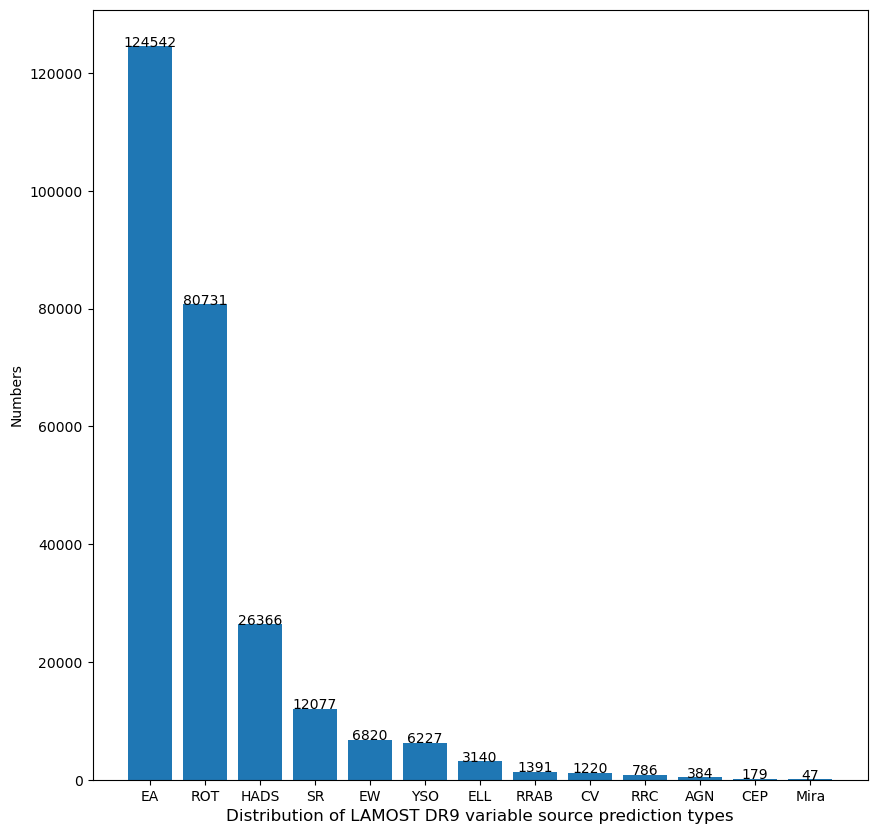

['EA', 'ROT', 'HADS', 'SR', 'EW', 'YSO', 'ELL', 'RRAB', 'CV', 'RRC', 'AGN', 'CEP', 'Mira']
[124542, 80731, 26366, 12077, 6820, 6227, 3140, 1391, 1220, 786, 384, 179, 47]


In [78]:
### 绘制分布图
plt.figure(figsize= (10,10))
x = list(lamost_data.pred_type.value_counts().index)
y = list(lamost_data.pred_type.value_counts())
for a,b in zip(x,y):
    #print(a,b)
    plt.text(a, b, b,horizontalalignment='center')
plt.bar(x, y)
#plt.savefig('./type.png')

plt.xlabel('Distribution of LAMOST DR9 variable source prediction types',fontsize = 12) 
plt.ylabel('Numbers',fontsize = 10) 
#plt.savefig('./LightGBM_type.png')
plt.show()
print(x)
print(y)

In [79]:
###大于95%
p_95 = lamost_data[lamost_data.pred_possibility >= 0.95]
p_95

ZTF_oid          ra        dec  Iter_std       Std  Skewness  \
0        796209200008137  261.544721  56.010894  0.012591  0.032788 -2.772986   
1        796209200004923  262.753611  56.234224  0.011675  0.031341 -2.771988   
2        796209200007368  261.475523  56.075838  0.014425  0.052053 -1.717994   
3        796209200011592  261.855825  56.544137  0.008280  0.011681 -0.015939   
4        796209200007527  261.692065  56.054656  0.012140  0.038886 -2.136281   
...                  ...         ...        ...       ...       ...       ...   
263903   766210200027017  292.787199  49.007283  0.032186  0.067274 -1.426806   
263904  1613205400006089  130.096188  20.946928  0.051495  0.428323  1.182694   
263906   609207400020424   67.674849  24.983359  0.012309  0.093842  4.533822   
263907   430209100007061  244.668308  -1.320716  0.060918  0.114423 -0.691681   
263909  1685206100036265  308.235820  28.989507  0.066015  0.095670  0.640608   

         Kurtosis  Amplitude    ChiSquare     Cusum  MedianAbsDev  \
0        9.198036   0.074980     6.942147  0.125547      0.009711   
1        8.999222   0.068546     6.308087  0.107762      0.009462   
2        2.047562   0.098935    17.005170  0.107189      0.012750   
3        1.345467   0.024447     1.131972  0.074264      0.006926   
4        4.421062   0.079185     9.651895  0.126875      0.010381   
...           ...        ...          ...       ...           ...   
263903   2.345201   0.154744    41.121700  0.320470      0.016939   
263904  -0.284526   0.692426  1806.583100  0.400575      0.021437   
263906  19.407048   0.252544    56.218395  0.180140      0.008955   
263907  -1.012365   0.175859    77.439800  0.261137      0.052669   
263909  -0.563191   0.172335    57.414814  0.165100      0.075266   

        Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0         5.778362e+02  1.577150     0.706334  0.612406   
1         4.697389e+02  1.523210     0.697884  0.607590   
2         1.439881e+03  1.479795     0.754154  0.740408   
3         2.584917e+00  1.603857     0.987308  0.755586   
4         6.824830e+02  1.643829     0.729566  0.660049   
...                ...       ...          ...       ...   
263903    1.037106e+04  0.830027     0.874677  0.769086   
263904    1.125900e+07  0.529943     0.684663  0.871490   
263906    7.822487e+04  2.223314     0.359226  0.411177   
263907    1.297513e+04  1.156310     0.852562  0.876834   
263909    8.524373e+03  1.682357     0.889153  0.845404   

        Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                       0.329949          0.113036 -0.111270   0.860529   
1                       0.330107          0.102377 -0.104423   0.852834   
2                       0.318261          0.173272 -0.148222   0.733641   
3                       0.996994          0.267218 -0.001247   0.647383   
4                       0.306943          0.131919 -0.119581   0.824723   
...                          ...               ...       ...        ...   
263903                  0.433796          0.160000 -0.162431   0.680000   
263904                  2.715151          0.240741  1.080953   0.666667   
263906                 10.411030          0.040000  0.434689   0.940000   
263907                  0.611502          0.301887 -0.200091   0.320755   
263909                  1.447797          0.340000  0.137638   0.240000   

            period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0         0.499453  0.035690           0.016519  261.544740  56.010870   
1         0.999202  0.053712           0.014377  262.753628  56.234198   
2         0.999202  0.066013           0.016972  261.475572  56.075804   
3        58.770974  0.045294           0.003438  261.855822  56.544114   
4         0.999150  0.055367           0.014072  261.692071  56.054634   
...            ...       ...                ...         ...        ...   
263903  143.843994  0.483360           0.016610  292.787467  49.007242   
263904  142.5

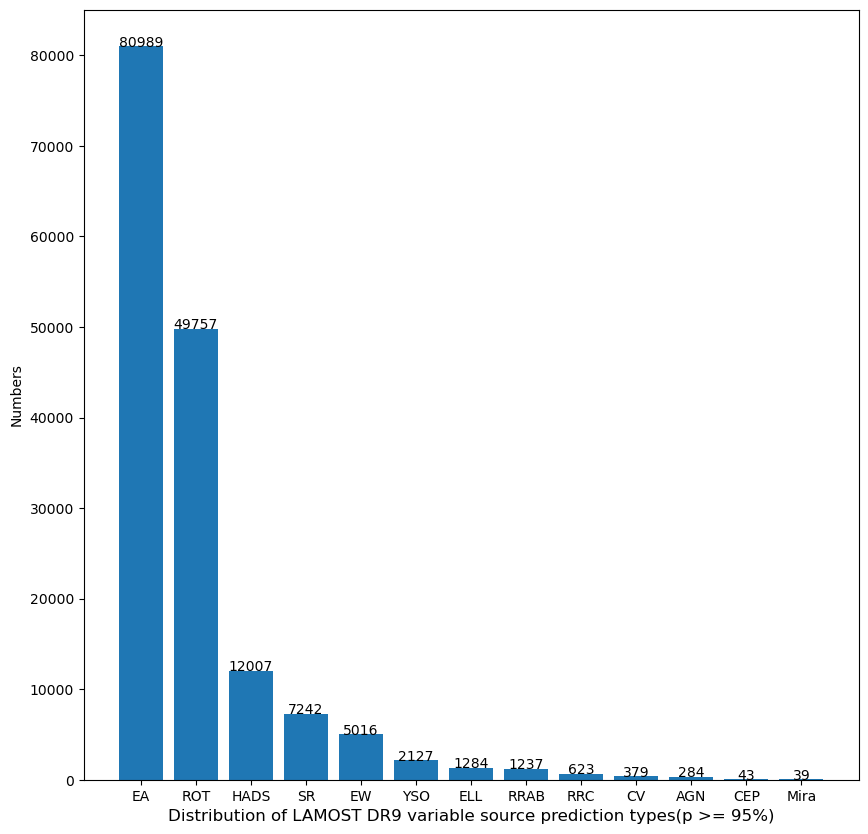

['EA', 'ROT', 'HADS', 'SR', 'EW', 'YSO', 'ELL', 'RRAB', 'RRC', 'CV', 'AGN', 'CEP', 'Mira']
[80989, 49757, 12007, 7242, 5016, 2127, 1284, 1237, 623, 379, 284, 43, 39]


In [80]:
### 绘制分布图

plt.figure(figsize= (10,10))
x = list(p_95.pred_type.value_counts().index)
y = list(p_95.pred_type.value_counts())
for a,b in zip(x,y):
    #print(a,b)
    plt.text(a, b, b,horizontalalignment='center')
plt.bar(x, y)
#plt.savefig('./type.png')

plt.xlabel('Distribution of LAMOST DR9 variable source prediction types(p >= 95%)',fontsize = 12) 
plt.ylabel('Numbers',fontsize = 10) 
#plt.savefig('./LightGBM_type.png')
plt.show()
print(x)
print(y)

In [81]:
lamost_data.to_csv('../classify_data/classify_result/lightgbm_pred_finally_candidate_3.csv',index=False)

In [82]:
p_95.to_csv('../classify_data/classify_result/lightgbm_pred_finally_candidate_95_2.csv',index=False)